In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [79]:
data = pd.read_csv('D:\\chrome downloads\\world hapiness report\\happiness_score_dataset.csv')

In [80]:
data.head()

,country_name,region_indicator,Happiness Rank,happiness_score,Standard Error,GDP_per_capita,Family,health_life_expectancy,Freedom,trust_government_corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [83]:
data_columns = ['country_name','region_indicator','happiness_score','GDP_per_capita','health_life_expectancy','Freedom','trust_government_corruption','Generosity']

In [84]:
data = data[data_columns].copy()

In [85]:
happy_df = data.rename({'country_name':'country_name','region_indicator':'region_indicator','happiness_score':'happiness_score','GDP_per_capita':'GDP_per_capita','health_life_expectancy':'health_life_expectancy','Freedom':'Freedom','trust_government_corruption':'trust_government_corruption','Generosity':'Generosity'})

In [86]:
happy_df.head()

,country_name,region_indicator,happiness_score,GDP_per_capita,health_life_expectancy,Freedom,trust_government_corruption,Generosity
0,Switzerland,Western Europe,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,0.90563,0.63297,0.32957,0.45811


In [87]:
happy_df.isnull().sum()

country_name                   0
region_indicator               0
happiness_score                0
GDP_per_capita                 0
health_life_expectancy         0
Freedom                        0
trust_government_corruption    0
Generosity                     0
dtype: int64

Text(0, 0.5, 'GDP per capita')

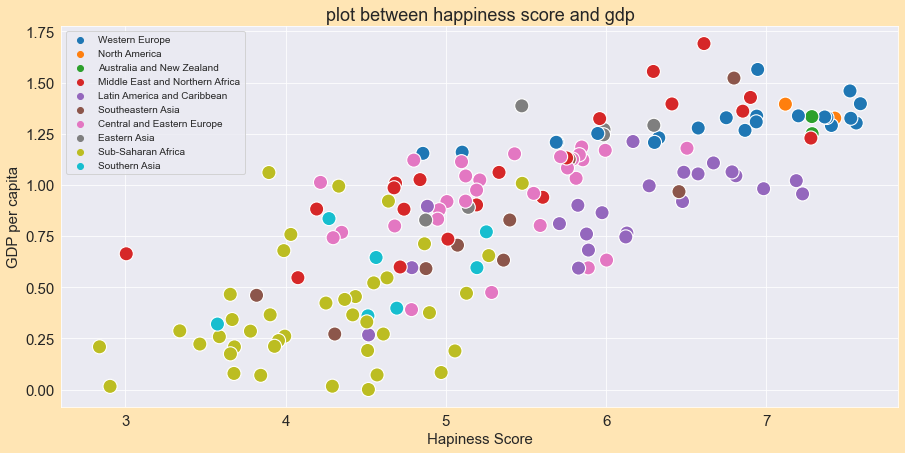

In [90]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('plot between happiness score and gdp')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.GDP_per_capita, hue = happy_df.region_indicator, s = 200);

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Hapiness Score')
plt.ylabel('GDP per capita')

In [93]:
gdp_region = happy_df.groupby('region_indicator')['GDP_per_capita'].sum()
gdp_region

region_indicator
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: GDP_per_capita, dtype: float64

Text(0, 0.5, '')

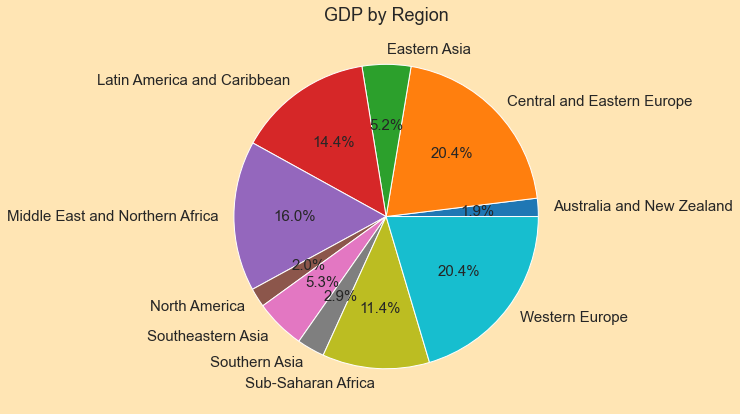

In [94]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [96]:
total_country = happy_df.groupby('region_indicator')[['country_name']].count()
print(total_country)

                                 country_name
region_indicator                             
Australia and New Zealand                   2
Central and Eastern Europe                 29
Eastern Asia                                6
Latin America and Caribbean                22
Middle East and Northern Africa            20
North America                               2
Southeastern Asia                           9
Southern Asia                               7
Sub-Saharan Africa                         40
Western Europe                             21


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15212\1714460683.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),


<AxesSubplot:>

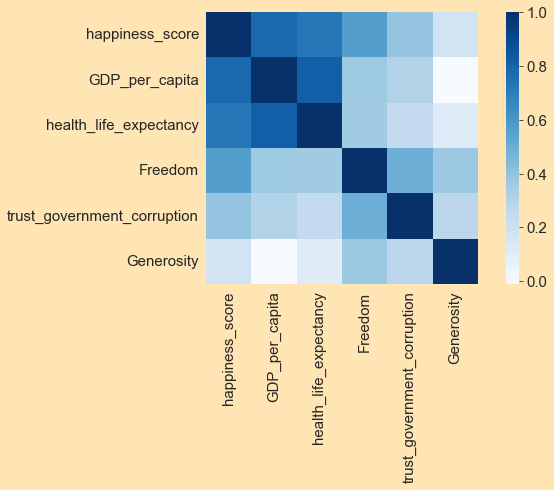

In [97]:
cor = happy_df.corr(method = "pearson")
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),
           cmap="Blues", square=True, ax=ax)

In [99]:
corruption = happy_df.groupby('region_indicator')[['trust_government_corruption']].mean()
corruption    

,trust_government_corruption
region_indicator,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

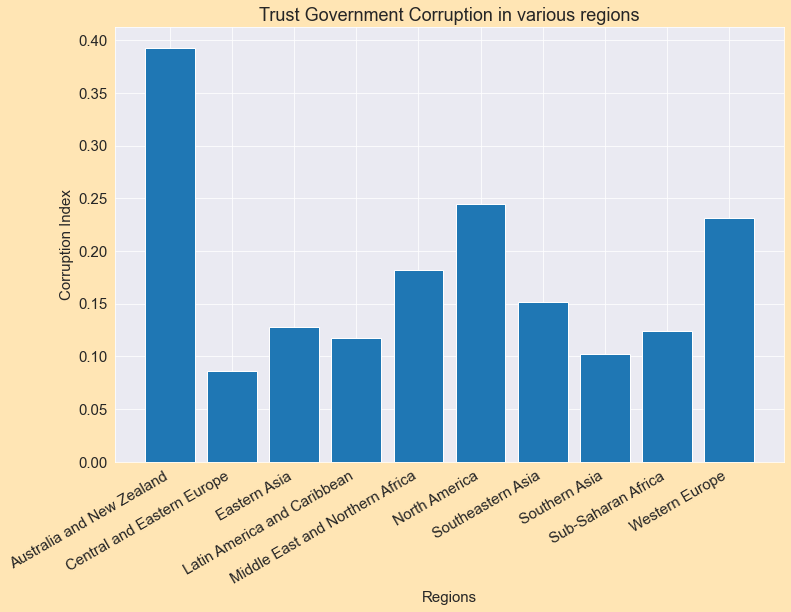

In [102]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.title('Trust Government Corruption in various regions')
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Corruption Index', fontsize = 15)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(corruption.index, corruption.trust_government_corruption)

In [103]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15212\4179076685.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation = 45, ha ='right')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15212\4179076685.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels, rotation = 45, ha ='right')


Text(599.1068181818181, 0.5, 'Life Expectancy')

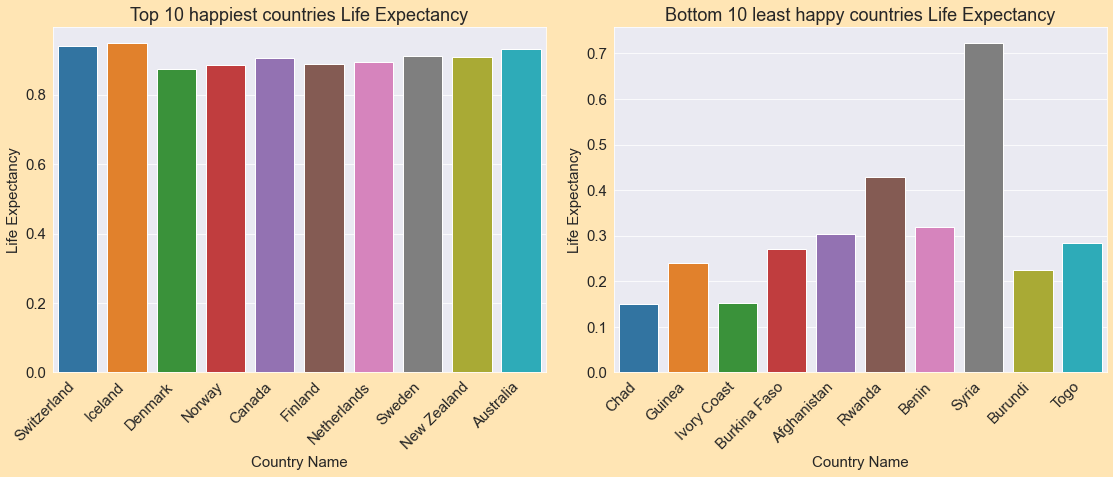

In [104]:
fig, axes = plt.subplots(1,2, figsize = (16,6))
plt.tight_layout(pad = 2)
xlabels = top_10.country_name
axes[0].set_title('Top 10 happiest countries Life Expectancy')
axes[0].set_xticklabels(xlabels, rotation = 45, ha ='right')
sns.barplot(x = top_10.country_name, y = top_10.health_life_expectancy, ax = axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

xlabels = bottom_10.country_name
axes[1].set_title('Bottom 10 least happy countries Life Expectancy')
axes[1].set_xticklabels(xlabels, rotation = 45, ha ='right')
sns.barplot(x = bottom_10.country_name, y = bottom_10.health_life_expectancy, ax = axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')

Text(0, 0.5, 'Happiness Score')

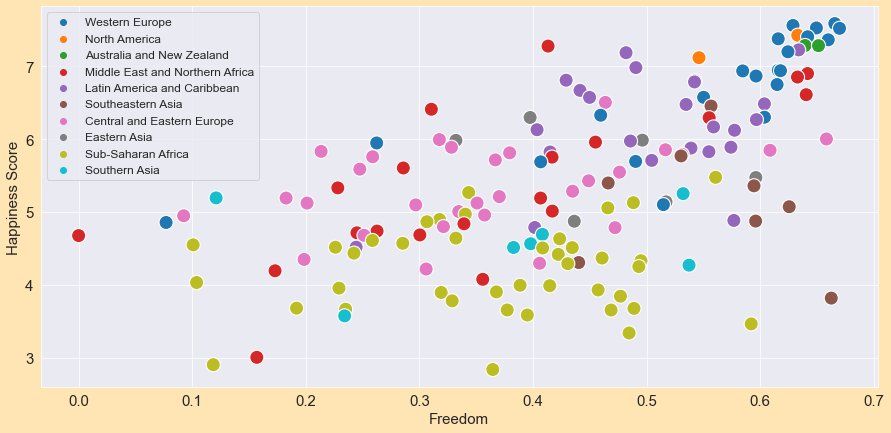

In [105]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x = happy_df.Freedom, y = happy_df.happiness_score, hue = happy_df.region_indicator, s = 200)
plt.legend(loc = 'upper left', fontsize = '12')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')

<BarContainer object of 10 artists>

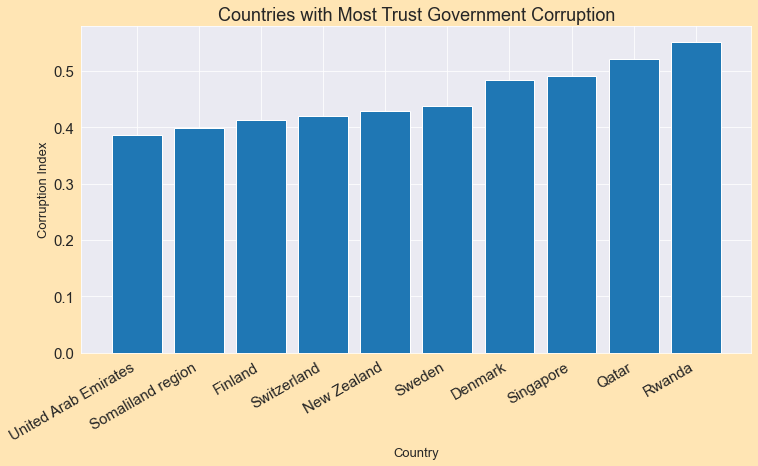

In [107]:
country = happy_df.sort_values(by = 'trust_government_corruption').tail(10)
plt.rcParams['figure.figsize']= (12,6)
plt.title('Countries with Most Trust Government Corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(country.country_name, country.trust_government_corruption)

Text(0, 0.5, 'Corruption')

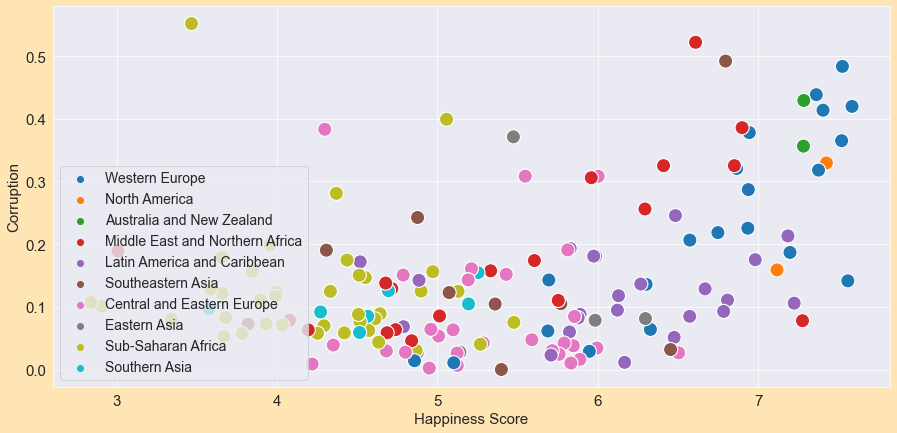

In [108]:
plt.rcParams['figure.figsize']= (15,7)
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.trust_government_corruption, hue = happy_df.region_indicator, s = 200)
plt.legend(loc = 'lower left', fontsize = '14')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')